# **Activity Detection**

data source: https://www.kaggle.com/datasets/luisomoreau/activity-detection

*Przyspieszenie (Accelerometer)*
- Accelerometer_z: Przyspieszenie wzdłuż osi Z.
- Accelerometer_y: Przyspieszenie wzdłuż osi Y.
- Accelerometer_x: Przyspieszenie wzdłuż osi X.

*Grawitacja (Gravity)*
- Gravity_z: Składowa wektora grawitacji wzdłuż osi Z.
- Gravity_y: Składowa wektora grawitacji wzdłuż osi Y.
- Gravity_x: Składowa wektora grawitacji wzdłuż osi X.

*Żyroskop (Gyroscope)*
- Gyroscope_z: Prędkość kątowa wokół osi Z.
- Gyroscope_y: Prędkość kątowa wokół osi Y.
- Gyroscope_x: Prędkość kątowa wokół osi X.

*Lokalizacja (Location)*
- Location_bearingAccuracy: Dokładność kierunku (azymutu) w lokalizacji.
- Location_speedAccuracy: Dokładność pomiaru prędkości w lokalizacji.
- Location_verticalAccuracy: Dokładność pomiaru wysokości (altitude) w lokalizacji.
- Location_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej.
- Location_speed: Prędkość w lokalizacji.
- Location_bearing: Kierunek (azymut) w lokalizacji.
- Location_altitude: Wysokość n.p.m. w lokalizacji.
- Location_longitude: Długość geograficzna w lokalizacji.
- Location_latitude: Szerokość geograficzna w lokalizacji.

*GPS (LocationGps)*
- LocationGps_bearingAccuracy: Dokładność kierunku (azymutu) uzyskana z GPS.
- LocationGps_speedAccuracy: Dokładność pomiaru prędkości uzyskana z GPS.
- LocationGps_verticalAccuracy: Dokładność pomiaru wysokości uzyskana z GPS.
- LocationGps_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej uzyskana z GPS.
- LocationGps_speed: Prędkość uzyskana z GPS.
- LocationGps_bearing: Kierunek (azymut) uzyskany z GPS.
- LocationGps_altitude: Wysokość n.p.m. uzyskana z GPS.
- LocationGps_longitude: Długość geograficzna uzyskana z GPS.
- LocationGps_latitude: Szerokość geograficzna uzyskana z GPS.

*Lokalizacja Sieciowa (LocationNetwork)*
- LocationNetwork_bearingAccuracy: Dokładność kierunku (azymutu) uzyskana z sieci.
- LocationNetwork_speedAccuracy: Dokładność pomiaru prędkości uzyskana z sieci.
- LocationNetwork_verticalAccuracy: Dokładność pomiaru wysokości uzyskana z sieci.
- LocationNetwork_horizontalAccuracy: Dokładność pomiaru szerokości i długości geograficznej uzyskana z sieci.
- LocationNetwork_speed: Prędkość uzyskana z sieci.
- LocationNetwork_bearing: Kierunek (azymut) uzyskany z sieci.
- LocationNetwork_altitude: Wysokość n.p.m. uzyskana z sieci.
- LocationNetwork_longitude: Długość geograficzna uzyskana z sieci.
- LocationNetwork_latitude: Szerokość geograficzna uzyskana z sieci.

*Magnetometr (Magnetometer)*
- Magnetometer_z: Natężenie pola magnetycznego wzdłuż osi Z.
- Magnetometer_y: Natężenie pola magnetycznego wzdłuż osi Y.
- Magnetometer_x: Natężenie pola magnetycznego wzdłuż osi X.

*Orientacja (Orientation)*
- Orientation_qz: Składowa Z kwaternionu reprezentującego orientację.
- Orientation_qy: Składowa Y kwaternionu reprezentującego orientację.
- Orientation_qx: Składowa X kwaternionu reprezentującego orientację.
- Orientation_qw: Składowa W kwaternionu reprezentującego orientację.
- Orientation_roll: Kąt przechylenia (roll) orientacji.
- Orientation_pitch: Kąt pochylenia (pitch) orientacji.
- Orientation_yaw: Kąt odchylenia (yaw) orientacji.

*Krokomierz (Pedometer)*
- Pedometer_steps: Liczba kroków zarejestrowanych przez krokomierz.

*Całkowite Przyspieszenie (TotalAcceleration)*
- TotalAcceleration_z: Całkowite przyspieszenie wzdłuż osi Z.
- TotalAcceleration_y: Całkowite przyspieszenie wzdłuż osi Y.
- TotalAcceleration_x: Całkowite przyspieszenie wzdłuż osi X.

### Imports

In [16]:
import pandas as pd
import numpy as np
import datetime
import os
import seaborn as sns
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split


### Reading csv

Considering only one activity now because there are the same csv files everywhere. Annotation is empty csv (in all activities) so leaving it.

In [2]:
file_paths = [
    ('..//data//Cycling-2023-09-14_06-22-31//Accelerometer.csv', 'Accelerometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gravity.csv', 'Gravity'),
    ('..//data//Cycling-2023-09-14_06-22-31//Gyroscope.csv', 'Gyroscope'),
    ('..//data//Cycling-2023-09-14_06-22-31//Location.csv', 'Location'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationGps.csv', 'LocationGps'),
    ('..//data//Cycling-2023-09-14_06-22-31//LocationNetwork.csv', 'LocationNetwork'),
    ('..//data//Cycling-2023-09-14_06-22-31//Magnetometer.csv', 'Magnetometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//Metadata.csv', 'Metadata'),
    ('..//data//Cycling-2023-09-14_06-22-31//Orientation.csv', 'Orientation'),
    ('..//data//Cycling-2023-09-14_06-22-31//Pedometer.csv', 'Pedometer'),
    ('..//data//Cycling-2023-09-14_06-22-31//TotalAcceleration.csv', 'TotalAcceleration')
]

In [3]:
dataframes = {name: pd.read_csv(path) for path, name in file_paths}

In [4]:
for name,df in dataframes.items():
    print(df.shape)

(71461, 5)
(71461, 5)
(71847, 5)
(230, 11)
(181, 11)
(17, 11)
(9037, 5)
(1, 10)
(71461, 9)
(32, 3)
(71456, 5)


In [5]:
def print_info(df,name):
        print("=====================================================================================================\n\n")
        print(f"{name} - below\n")
        print("=====================================================================================================\n\n")
        print(df.head())
        print("\n")
        print(df.info())

In [6]:
for name,df in dataframes.items():
    print_info(df,name)



Accelerometer - below



                  time  seconds_elapsed         z         y         x
0  1694672551573238300         0.121238  0.112874 -0.020792  0.156903
1  1694672551575757300         0.123757  0.235006 -0.003417  0.169683
2  1694672551578276400         0.126276  0.223140 -0.081017  0.135991
3  1694672551580795600         0.128796  0.191143 -0.067305  0.127650
4  1694672551583314400         0.131314  0.076245 -0.029743  0.083652


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71461 entries, 0 to 71460
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             71461 non-null  int64  
 1   seconds_elapsed  71461 non-null  float64
 2   z                71461 non-null  float64
 3   y                71461 non-null  float64
 4   x                71461 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 2.7 MB
None


Gravity - below



                  time  seconds_elapsed      

In [7]:
dataframes.pop('Metadata')

,version,device name,recording epoch time,recording time,recording timezone,platform,appVersion,device id,sensors,sampleRateMs
0,3,CPH2399,1694672551452,2023-09-14_06-22-31,Europe/Paris,android,1.20.0,c8dd5094-d4bd-47e1-b2c0-cc4205c1707a,Accelerometer|Gravity|Gyroscope|Orientation|Ma...,0|0|0|0|0|0|10||0|0|0


We decided to not consider Metadata in further analysis due to lack of the importance.

Now we can merge all csv files into one dataframe. We will use the timestamp as the index (so we don't need secodns_elapsed column - we won't include it). As we said we will not include Metadata and Annotation.

In [8]:
sciezka = '..//data//'
zawartosc = os.listdir(sciezka)

In [9]:
# Ścieżka do katalogu głównego
sciezka = '..//data//'

# Wylistowanie wszystkich folderów w głównym katalogu
zawartosc = [folder for folder in os.listdir(sciezka) if os.path.isdir(os.path.join(sciezka, folder))]

for folder in zawartosc:
    
    #sciezki do nowego folderu w ktorym bedziemy zapisywać wyczyszczone dane
    sciezka_do_nowego_folderu = '..//cleared_data//'
    
    pelna_sciezka_do_nowego_folderu = os.path.join(sciezka_do_nowego_folderu, folder)
    os.makedirs(pelna_sciezka_do_nowego_folderu, exist_ok=True)
    # Pełna ścieżka do folderu
    pelna_sciezka_folderu = os.path.join(sciezka, folder)
    
    # Wylistowanie wszystkich plików w folderze
    f = os.listdir(pelna_sciezka_folderu)
    
    for plik in f:
        pelna_sciezka_pliku = os.path.join(pelna_sciezka_folderu, plik)
        
        # Sprawdzenie, czy plik nie jest pusty przed wczytaniem
        if os.path.getsize(pelna_sciezka_pliku) > 0:
            try:
                # Próba wczytania pliku CSV
                df = pd.read_csv(pelna_sciezka_pliku)
                if 'time' in df.columns:
                    df['time'] = pd.to_datetime(df['time'])
                else:
                    continue
                print(f'Wczytano plik: {pelna_sciezka_pliku}')
                if 'seconds_elapsed' in df.columns:
                    df = df.drop(columns=['seconds_elapsed'])
                    df.to_csv(pelna_sciezka_do_nowego_folderu+'//'+plik, index=False)
            except pd.errors.EmptyDataError:
                print(f'Plik {pelna_sciezka_pliku} jest pusty lub nie ma kolumn do sparsowania.')
        else:
            print(f'Plik {pelna_sciezka_pliku} jest pusty.')


Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-22-31\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gravity.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Gyroscope.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Location.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationGps.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\LocationNetwork.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Magnetometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Orientation.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\Pedometer.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-22-31\TotalAcceleration.csv
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Accelerometer.csv
Plik ..//data//Cycling-2023-09-14_06-33-47\Annotation.csv jest pusty.
Wczytano plik: ..//data//Cycling-2023-09-14_06-33-47\Gravity.csv
Wczytano plik: ..//data//Cycling

In [10]:
folder_path = '../cleared_data'
folders = os.listdir(folder_path)

for folder in folders:
    one_activity_path = os.path.join(folder_path, folder)
    print("Files in", folder + ":")
    print(os.listdir(one_activity_path))
    print()

i = 1
for dir in folders:
    activity = dir.split("-")[0]

    folder = os.path.join(folder_path, dir)

    file_list = [f for f in os.listdir(folder) if f.endswith('.csv')]

    result = pd.DataFrame({'time': []})
    
    

    for file_path in file_list:
        file = os.path.splitext(os.path.basename(file_path))[0]
        if file == "Annotation" or file == "Metadata":
            continue
        file_name = file + "_" + str(i)

        file_data = pd.read_csv(os.path.join(folder, file_path))

        file_data['time'] = pd.to_datetime(file_data['time'])
        
        # Rename columns except 'time'
        file_data = file_data.rename(columns={col: file + "_" + col if col != 'time' else col for col in file_data.columns})

        if result.empty:
            result = file_data
        else:
            # Perform fuzzy join on 'time' column
            result = pd.merge_asof(result.sort_values('time'), file_data.sort_values('time'), on='time', direction='nearest')

    result.to_csv(f'../merged_data/{activity}_{i}.csv', index=False)
    i += 1

Files in Cycling-2023-09-14_06-22-31:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-33-47:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-14_06-47-00:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_07-43-07:
['Accelerometer.csv', 'Gravity.csv', 'Gyroscope.csv', 'Location.csv', 'LocationGps.csv', 'LocationNetwork.csv', 'Magnetometer.csv', 'Orientation.csv', 'Pedometer.csv', 'TotalAcceleration.csv']

Files in Cycling-2023-09-16_09-25-09:
['Accelerometer.csv', 'Gravity.csv

Now we are going to merge all activities into one big csv file

### Merging

In [11]:
cycling_1 = pd.read_csv('..//merged_data//Cycling_1.csv')
cycling_2 = pd.read_csv('..//merged_data//Cycling_2.csv')
cycling_3 = pd.read_csv('..//merged_data//Cycling_3.csv')
cycling_4 = pd.read_csv('..//merged_data//Cycling_4.csv')
cycling_5 = pd.read_csv('..//merged_data//Cycling_5.csv')
cycling_6 = pd.read_csv('..//merged_data//Cycling_6.csv')
cycling_7 = pd.read_csv('..//merged_data//Cycling_7.csv')
sitting_8 = pd.read_csv('..//merged_data//Sitting_8.csv')
sitting_9 = pd.read_csv('..//merged_data//Sitting_9.csv')
sitting_10 = pd.read_csv('..//merged_data//Sitting_10.csv')
walking_11 = pd.read_csv('..//merged_data//Walking_11.csv')
walking_12 = pd.read_csv('..//merged_data//Walking_12.csv')

In [12]:
cycling_1['TYPE'] = 'Cycling'
cycling_2['TYPE'] = 'Cycling'
cycling_3['TYPE'] = 'Cycling'
cycling_4['TYPE'] = 'Cycling'
cycling_5['TYPE'] = 'Cycling'
cycling_6['TYPE'] = 'Cycling'
cycling_7['TYPE'] = 'Cycling'
sitting_8['TYPE'] = 'Sitting'
sitting_9['TYPE'] = 'Sitting'
sitting_10['TYPE'] = 'Sitting'
walking_11['TYPE'] = 'Walking'
walking_12['TYPE'] = 'Walking'

In [13]:
cyclings = [
    cycling_1,cycling_2,cycling_3,cycling_4,cycling_5,cycling_6,cycling_7
]
sittings = [
    sitting_8,sitting_9,sitting_10
]
walkings = [
    walking_11,walking_12
]
df_cyclings = pd.concat(cyclings, axis=0)
df_cyclings.reset_index(drop=True, inplace=True)

df_sittings = pd.concat(sittings, axis=0)
df_sittings.reset_index(drop=True, inplace=True)

df_walkings = pd.concat(walkings, axis=0)
df_walkings.reset_index(drop=True, inplace=True)

datasets = [df_cyclings,df_sittings,df_walkings]
df_original = pd.concat(datasets, axis=0)
df_original.reset_index(drop=True, inplace=True)

In [14]:
df_original.head()

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x,TYPE
0,2023-09-14 06:22:31.573238300,0.112874,-0.020792,0.156903,8.257127,5.262842,0.541047,-0.113575,0.065037,0.172425,...,0.261542,0.852361,-0.065428,-0.566475,-0.973963,0,8.370001,5.24205,0.69795,Cycling
1,2023-09-14 06:22:31.575757300,0.235006,-0.003417,0.169683,8.254994,5.266468,0.538318,-0.108350,0.049087,0.170363,...,0.261673,0.852358,-0.065115,-0.566913,-0.973670,0,8.490001,5.26305,0.70800,Cycling
2,2023-09-14 06:22:31.578276400,0.223140,-0.081017,0.135991,8.252911,5.269967,0.536009,-0.107250,0.024612,0.168162,...,0.261808,0.852357,-0.064853,-0.567336,-0.973392,0,8.476050,5.18895,0.67200,Cycling
3,2023-09-14 06:22:31.580795600,0.191143,-0.067305,0.127650,8.250857,5.273355,0.534300,-0.105050,-0.006187,0.165000,...,0.261953,0.852359,-0.064663,-0.567746,-0.973121,0,8.442000,5.20605,0.66195,Cycling
4,2023-09-14 06:22:31.583314400,0.076245,-0.029743,0.083652,8.248755,5.276743,0.533298,-0.107250,-0.031762,0.162800,...,0.262116,0.852364,-0.064558,-0.568155,-0.972857,0,8.325001,5.24700,0.61695,Cycling


In [15]:
df_original.to_csv('../final_data/merged_data.csv', index=False)

### Splitting into train, test and valid

In [18]:
activities = pd.read_csv('../final_data/merged_data.csv')
x_train_valid, x_test, y_train_valid, y_test = train_test_split(
    activities.drop(columns=['TYPE']), # X
    activities['TYPE'], # y
    test_size=0.3, random_state=42)
x_train_valid.shape, y_train_valid.shape, x_test.shape, y_test.shape 

((1942857, 51), (1942857,), (832654, 51), (832654,))

In [19]:
x_train, x_valid, y_train, y_valid = train_test_split(
    x_train_valid, # X
    y_train_valid, # y
    test_size=0.3, random_state=42)
x_train.shape, y_train.shape, x_valid.shape, y_valid.shape

((1359999, 51), (1359999,), (582858, 51), (582858,))

### saving to files


In [20]:
x_train.to_csv("..//final_data//x_train.csv", index=False)
y_train.to_csv("..//final_data//y_train.csv", index=False)
x_valid.to_csv("..//final_data//x_valid.csv", index=False)
y_valid.to_csv("..//final_data//y_valid.csv", index=False)
x_test.to_csv("..//final_data//x_test.csv", index=False)
y_test.to_csv("..//final_data//y_test.csv", index=False)

From now we start EDA on x_train and y_train 

### Reading files

In [21]:
x_train = pd.read_csv("..//final_data//x_train.csv")
y_train = pd.read_csv("..//final_data//y_train.csv")
x_valid = pd.read_csv("..//final_data//x_valid.csv")
y_valid = pd.read_csv("..//final_data//y_valid.csv")

In [22]:
x_train.head()

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qy,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x
0,2023-09-16 09:34:48.959553000,0.558249,-0.458504,2.451278,-1.446249,-4.400446,8.643773,1.756975,-0.023375,0.141487,...,-0.172260,-0.737588,0.421460,-1.736626,0.466687,2.285630,888,-0.88800,-4.858950,11.095051
1,2023-09-14 06:38:29.853834000,1.233008,1.743228,-2.914324,-4.173008,-1.798278,8.690374,0.194700,0.168162,0.058300,...,-0.395287,0.745942,0.149509,-2.018331,0.184949,-2.283581,278,-2.94000,-0.055050,5.776050
2,2023-09-14 09:14:58.748634400,0.039914,-0.001144,-0.040015,-7.554914,0.529144,6.230065,-0.004812,0.002337,0.000137,...,-0.337297,0.878311,0.147812,-2.452028,-0.054005,-2.388868,0,-7.51500,0.528000,6.190050
3,2023-09-14 06:47:33.304431900,-1.061142,-0.807573,-2.068653,-3.742908,-5.407377,7.274703,0.648313,0.064488,1.030975,...,-0.794271,-0.244892,0.524147,-2.046029,0.584139,0.235333,36,-4.80405,-6.214950,5.206050
4,2023-09-16 07:53:04.401527300,-0.134196,0.001693,-0.164136,-1.567854,-9.526693,-1.718814,0.020488,0.069850,0.038362,...,0.758941,0.061965,0.063228,2.307780,1.330932,0.832013,1011,-1.70205,-9.525001,-1.882950


In [23]:
y_train.head()

,TYPE
0,Cycling
1,Cycling
2,Sitting
3,Cycling
4,Cycling


In [24]:
x_valid.head()

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gravity_z,Gravity_y,Gravity_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,...,Orientation_qy,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x
0,2023-09-14 21:54:37.848866600,-4.874527,-2.624255,-4.599854,-2.189424,-9.465745,1.332854,-0.988075,0.933625,-0.679112,...,0.493049,-0.607071,0.424195,-2.594466,1.306296,-2.200347,287,-7.063951,-12.090000,-3.26700
1,2023-09-14 21:54:45.221520000,-2.127822,-0.548177,1.463633,1.582872,-9.661874,-0.559583,0.744425,-0.509438,0.943800,...,0.409353,-0.501715,0.617318,0.339818,1.398733,0.966352,296,-0.544950,-10.210051,0.90405
2,2023-09-14 09:16:19.817178400,0.063086,0.018800,-0.057777,-7.573136,0.507250,6.209727,0.001512,-0.000825,-0.002062,...,-0.336381,0.879193,0.145857,-2.454828,-0.051781,-2.392238,0,-7.510050,0.526050,6.15195
3,2023-09-16 07:47:00.172660000,0.223685,1.249338,-0.574404,-4.974635,-8.343288,1.346454,-0.283800,0.224125,-0.587400,...,-0.867721,-0.005344,0.081440,-2.878819,1.019347,-0.135139,396,-4.750950,-7.093950,0.77205
4,2023-09-16 07:45:21.589042000,1.102203,0.731381,-0.862363,-6.207153,-7.312331,2.042413,0.602663,-0.278163,1.222787,...,0.555434,-0.712722,0.254635,-2.823805,0.841532,-1.960766,246,-5.104950,-6.580950,1.18005


In [25]:
y_valid.head()

,TYPE
0,Walking
1,Walking
2,Sitting
3,Cycling
4,Cycling


### Take a look at sensors in our training dataset    

Accelerometer - important in movement analysis

Annotation - deleted - empty

Gravity - skipped - unnsecessary (same value) - proven below

In [28]:
np.sqrt(x_train['Gravity_x'] ** 2 + x_train['Gravity_y'] ** 2 + x_train['Gravity_z'] ** 2).describe()

count    1.359999e+06
mean     9.806651e+00
std      1.442550e-06
min      9.806637e+00
25%      9.806650e+00
50%      9.806651e+00
75%      9.806652e+00
max      9.806660e+00
dtype: float64

Gyroscope - important same as accelerometer

Location, LocationGPS, LocationNetwork - at this moment it seems to be important

Magnetometer - important

Metadata - not included

Orientation - we dont know yet

Pedometer - number of steps (it is in cycling) - important

TotalAcceleration - (Accelerometer + Gravity =?= TotalAcceleration) (HYPOTHESIS) - important 99%

In [30]:
tmp = pd.DataFrame({
        'x' : abs(x_train['Accelerometer_x'] + x_train['Gravity_x'] - x_train['TotalAcceleration_x']), 
        'y' : abs(x_train['Accelerometer_y'] + x_train['Gravity_y'] - x_train['TotalAcceleration_y']),
        'z' : abs(x_train['Accelerometer_z'] + x_train['Gravity_z'] - x_train['TotalAcceleration_z'])
        }).dropna()    
tmp

,x,y,z
0,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000e+00,1.117587e-08,0.000000e+00
2,0.000000e+00,1.110223e-16,8.881784e-16
3,0.000000e+00,0.000000e+00,0.000000e+00
4,0.000000e+00,1.776357e-15,2.220446e-16
...,...,...,...
1359994,0.000000e+00,0.000000e+00,0.000000e+00
1359995,0.000000e+00,1.776357e-15,0.000000e+00
1359996,0.000000e+00,5.551115e-17,0.000000e+00
1359997,1.110223e-16,0.000000e+00,3.552714e-15


In [31]:
tmp.describe()

,x,y,z
count,1.359999e+06,1.359999e+06,1.359999e+06
mean,6.841509e-07,1.191613e-06,1.687011e-06
std,3.176416e-04,5.750269e-04,6.199747e-04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.881784e-16,1.110223e-16,2.220446e-16
max,2.509500e-01,5.370002e-01,4.570503e-01


close to 0 so we think we can leave ony TotalAcceleration in our data frame

In [34]:
x_train.drop(columns=['Gravity_x', 'Gravity_y', 'Gravity_z'], inplace=True)

### Advanced EDA

In [35]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359999 entries, 0 to 1359998
Data columns (total 48 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   time                                1359999 non-null  object 
 1   Accelerometer_z                     1359999 non-null  float64
 2   Accelerometer_y                     1359999 non-null  float64
 3   Accelerometer_x                     1359999 non-null  float64
 4   Gyroscope_z                         1359999 non-null  float64
 5   Gyroscope_y                         1359999 non-null  float64
 6   Gyroscope_x                         1359999 non-null  float64
 7   Location_bearingAccuracy            1359999 non-null  float64
 8   Location_speedAccuracy              1359999 non-null  float64
 9   Location_verticalAccuracy           1359999 non-null  float64
 10  Location_horizontalAccuracy         1359999 non-null  float64
 11  Location_sp

In [36]:
x_train.describe()

,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,Location_bearingAccuracy,Location_speedAccuracy,Location_verticalAccuracy,Location_horizontalAccuracy,...,Orientation_qy,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x
count,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,...,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359998e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06
mean,8.540952e-02,-2.179136e-01,-2.021225e-01,-1.232859e-02,3.230422e-03,-5.668969e-04,1.798063e+01,1.204408e+00,1.390050e+01,5.620042e+00,...,-2.504428e-01,-1.231616e-01,3.186100e-01,-1.722591e+00,6.311121e-01,-4.749584e-01,5.904498e+02,-3.999048e+00,-5.260043e+00,3.878864e+00
std,2.474240e+00,2.518269e+00,2.295758e+00,7.296111e-01,6.726834e-01,9.921875e-01,4.545167e+01,1.232588e+00,2.065057e+01,3.518656e+00,...,5.022827e-01,6.147604e-01,2.171552e-01,1.608217e+00,5.141741e-01,1.756420e+00,5.794697e+02,3.638465e+00,4.725712e+00,4.269208e+00
min,-5.080528e+01,-5.670343e+01,-5.045023e+01,-9.950325e+00,-1.255664e+01,-7.471750e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.337000e+00,...,-9.985400e-01,-9.985670e-01,5.302581e-07,-3.141591e+00,-1.290022e+00,-3.141581e+00,0.000000e+00,-5.512305e+01,-6.494296e+01,-5.016105e+01
25%,-5.255368e-01,-7.862618e-01,-7.152160e-01,-3.455375e-01,-2.022625e-01,-2.950750e-01,0.000000e+00,0.000000e+00,1.387071e+00,3.900000e+00,...,-6.584114e-01,-6.557375e-01,1.456898e-01,-2.717986e+00,1.743625e-01,-2.295361e+00,8.200000e+01,-7.444951e+00,-8.598001e+00,6.139500e-01
50%,5.956066e-02,-6.634712e-03,-4.970312e-02,-8.250000e-04,1.237500e-03,-2.750000e-04,0.000000e+00,1.200000e+00,9.304260e+00,4.445000e+00,...,-3.320107e-01,-3.696966e-01,2.877433e-01,-2.421524e+00,5.900986e-01,-5.615644e-01,4.050000e+02,-3.642000e+00,-5.314050e+00,3.757050e+00
75%,5.622004e-01,4.661062e-01,6.573154e-01,2.598750e-01,2.578125e-01,2.787125e-01,9.600000e+00,1.900000e+00,1.610000e+01,6.809000e+00,...,-1.674980e-03,4.176465e-01,5.039137e-01,-1.742379e+00,1.109670e+00,9.496517e-01,1.015000e+03,-1.636950e+00,-1.080000e+00,6.259050e+00
max,5.562388e+01,3.304668e+01,3.710480e+01,8.707188e+00,9.586087e+00,9.079537e+00,1.799000e+02,1.400000e+01,1.442000e+02,1.161000e+02,...,9.991418e-01,9.985880e-01,9.919167e-01,3.141590e+00,1.570796e+00,3.141590e+00,2.158000e+03,5.212995e+01,2.454795e+01,4.634505e+01


As we can see there are many null values in Location columns

In [38]:
null_counts = x_train.isnull().sum()

print(null_counts)

time                                      0
Accelerometer_z                           0
Accelerometer_y                           0
Accelerometer_x                           0
Gyroscope_z                               0
Gyroscope_y                               0
Gyroscope_x                               0
Location_bearingAccuracy                  0
Location_speedAccuracy                    0
Location_verticalAccuracy                 0
Location_horizontalAccuracy               0
Location_speed                            0
Location_bearing                          0
Location_altitude                         0
Location_longitude                        0
Location_latitude                         0
LocationGps_bearingAccuracy           57128
LocationGps_speedAccuracy             57128
LocationGps_verticalAccuracy          57128
LocationGps_horizontalAccuracy        57128
LocationGps_speed                     57128
LocationGps_bearing                   57128
LocationGps_altitude            

array([[<Axes: title={'center': 'Accelerometer_z'}>,
        <Axes: title={'center': 'Accelerometer_y'}>,
        <Axes: title={'center': 'Accelerometer_x'}>,
        <Axes: title={'center': 'Gyroscope_z'}>,
        <Axes: title={'center': 'Gyroscope_y'}>,
        <Axes: title={'center': 'Gyroscope_x'}>,
        <Axes: title={'center': 'Location_bearingAccuracy'}>],
       [<Axes: title={'center': 'Location_speedAccuracy'}>,
        <Axes: title={'center': 'Location_verticalAccuracy'}>,
        <Axes: title={'center': 'Location_horizontalAccuracy'}>,
        <Axes: title={'center': 'Location_speed'}>,
        <Axes: title={'center': 'Location_bearing'}>,
        <Axes: title={'center': 'Location_altitude'}>,
        <Axes: title={'center': 'Location_longitude'}>],
       [<Axes: title={'center': 'Location_latitude'}>,
        <Axes: title={'center': 'LocationGps_bearingAccuracy'}>,
        <Axes: title={'center': 'LocationGps_speedAccuracy'}>,
        <Axes: title={'center': 'LocationG

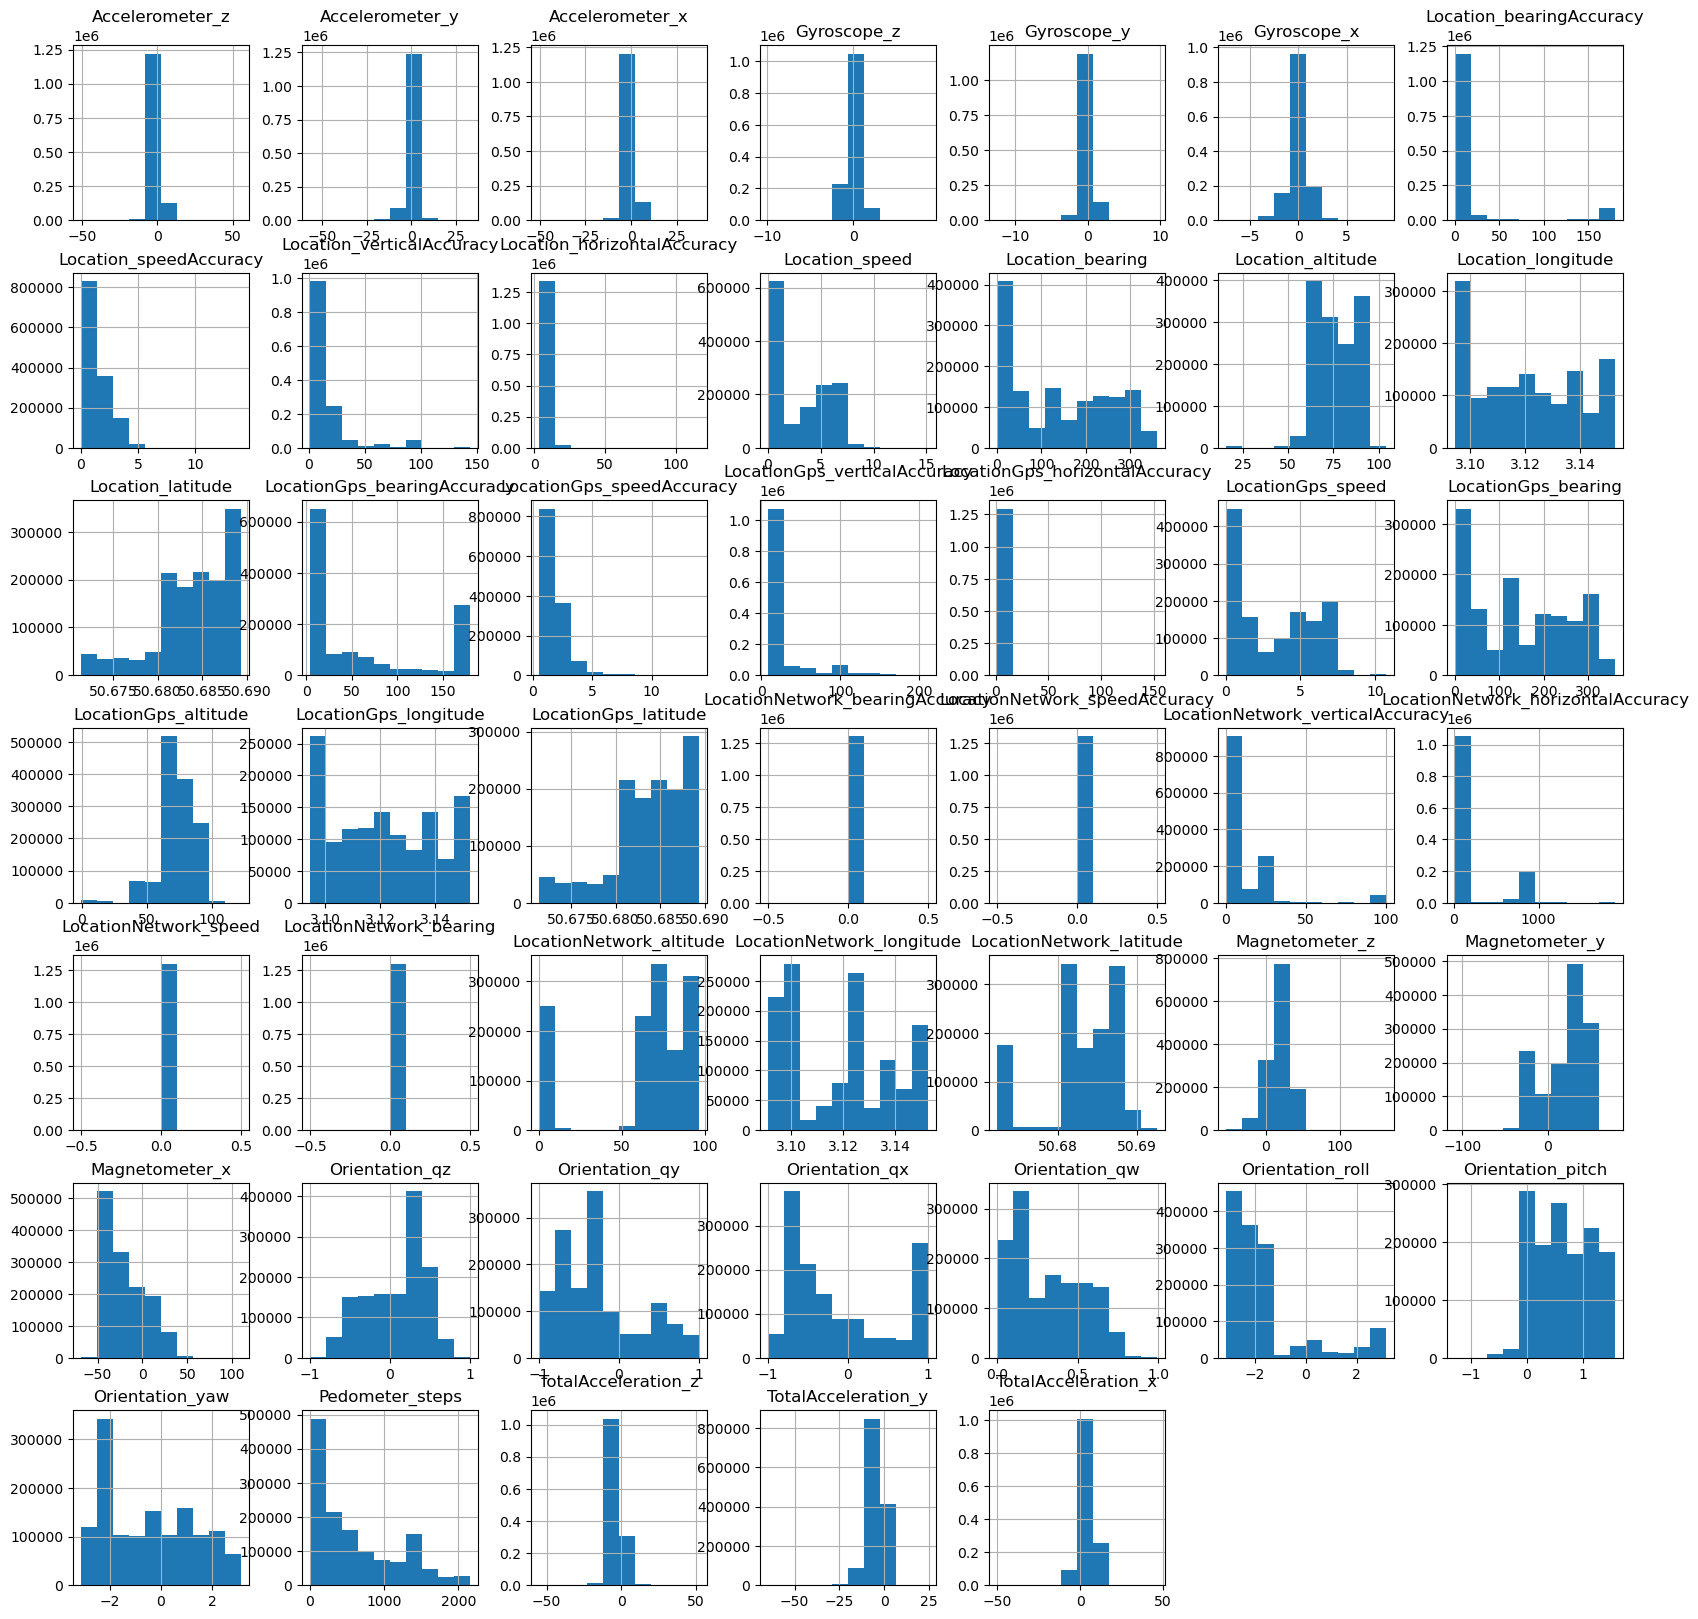

In [39]:
x_train.hist(figsize=(20,20))

columns LocationNetwork_bearingAccuracy, LocationNetwork_speedAccuracy, LocationNetwork_horizontalAccuracy, LocationNetwork_speed, LocationNetwork_bearing, Location_horizontalAccuracy, LocationGps_horizontalAccuracy to check

In [40]:
print(x_train['LocationNetwork_bearingAccuracy'].describe())
print(x_train['LocationNetwork_speedAccuracy'].describe())
print(x_train['LocationNetwork_horizontalAccuracy'].describe())
print(x_train['LocationNetwork_speed'].describe())
print(x_train['LocationNetwork_bearing'].describe())
print(x_train['Location_horizontalAccuracy'].describe())

count    1302871.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_bearingAccuracy, dtype: float64
count    1302871.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speedAccuracy, dtype: float64
count    1.302871e+06
mean     2.062672e+02
std      3.068311e+02
min      1.150500e+01
25%      1.650200e+01
50%      5.496600e+01
75%      1.496000e+02
max      1.899999e+03
Name: LocationNetwork_horizontalAccuracy, dtype: float64
count    1302871.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: LocationNetwork_speed, dtype: float64
count    1302871.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: Loc

Almost all columns from above are 0 - delete them

In [44]:
x_train = x_train.drop(columns=['LocationNetwork_bearingAccuracy','LocationNetwork_speedAccuracy','LocationNetwork_speed','LocationNetwork_bearing','Location_horizontalAccuracy'])
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359999 entries, 0 to 1359998
Data columns (total 43 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   time                                1359999 non-null  object 
 1   Accelerometer_z                     1359999 non-null  float64
 2   Accelerometer_y                     1359999 non-null  float64
 3   Accelerometer_x                     1359999 non-null  float64
 4   Gyroscope_z                         1359999 non-null  float64
 5   Gyroscope_y                         1359999 non-null  float64
 6   Gyroscope_x                         1359999 non-null  float64
 7   Location_bearingAccuracy            1359999 non-null  float64
 8   Location_speedAccuracy              1359999 non-null  float64
 9   Location_verticalAccuracy           1359999 non-null  float64
 10  Location_speed                      1359999 non-null  float64
 11  Location_be

### Correlation heatmap

In [45]:
x_train['time'] = pd.to_datetime(x_train['time'])
x_train['time'] = x_train['time'].apply(lambda x: x.timestamp())

DF ORIGINAL


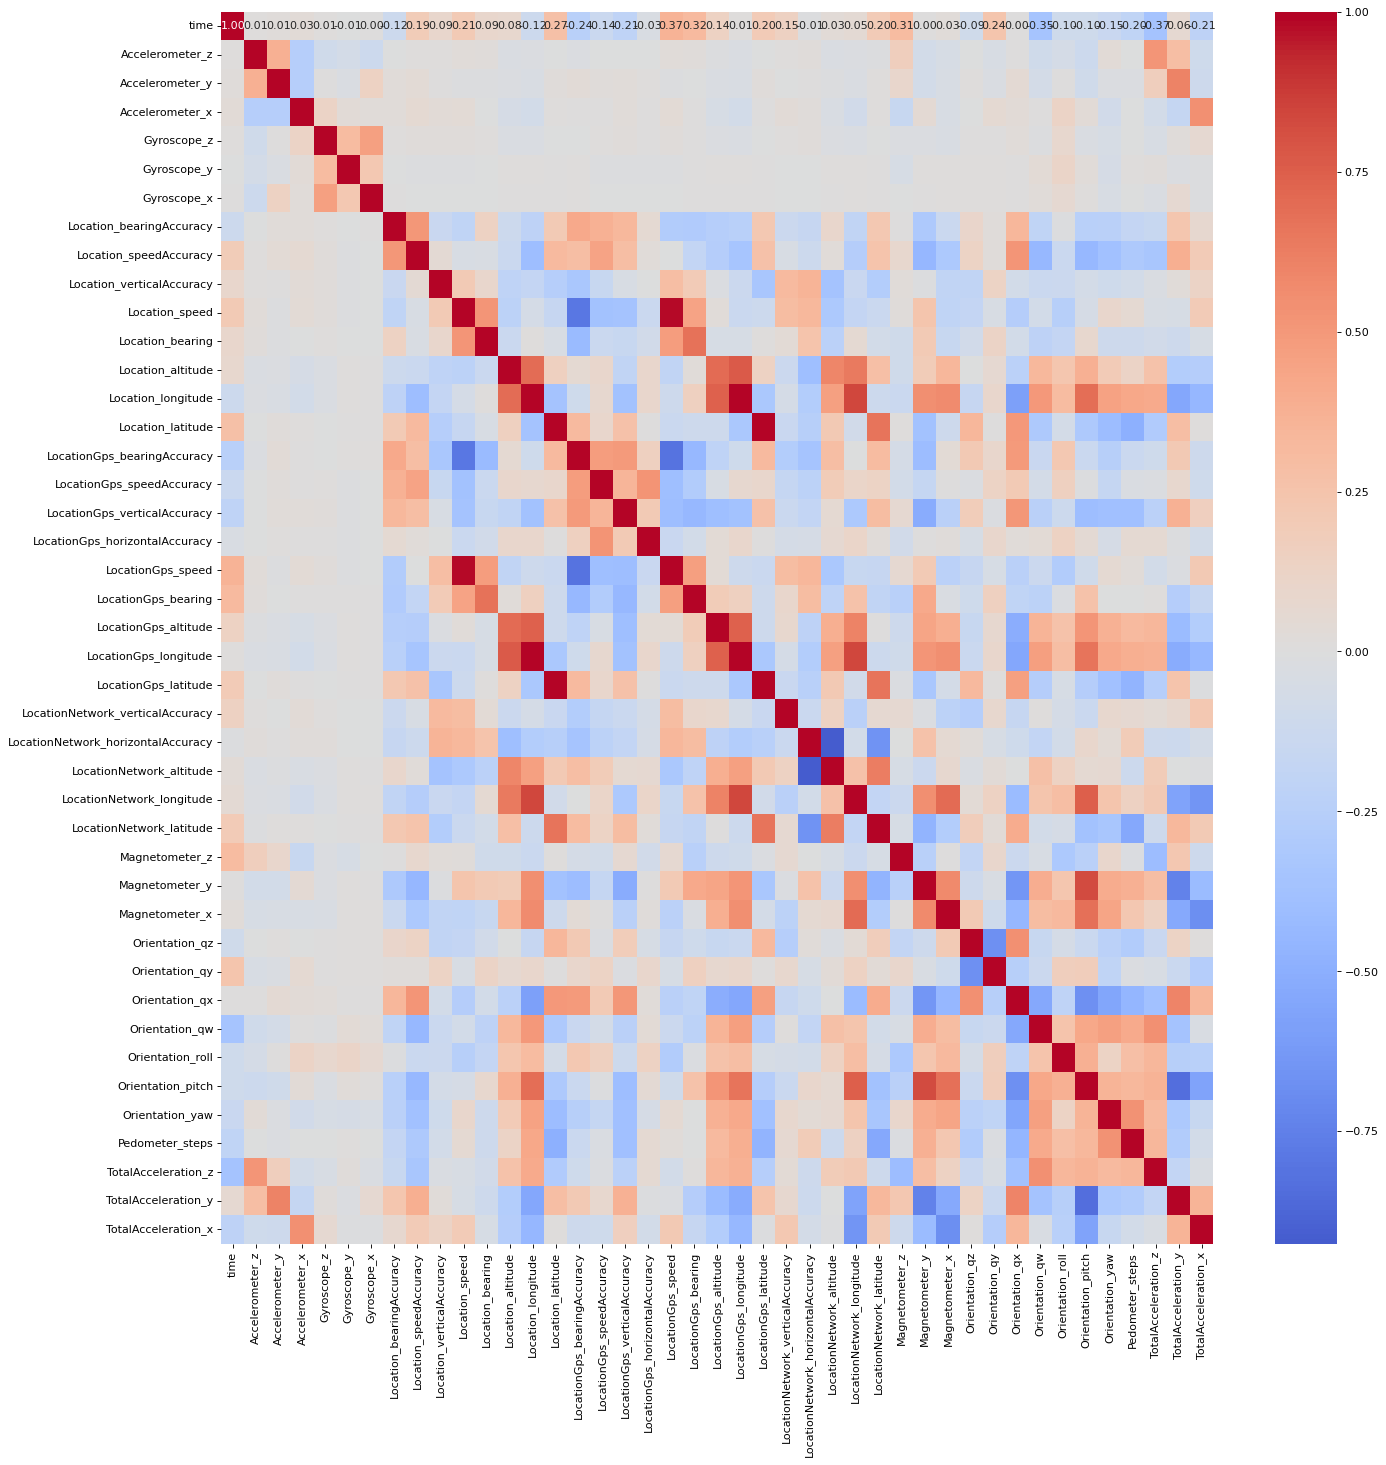

In [46]:
df_original_corr = x_train.loc[:,x_train.columns != 'TYPE'].corr()
print("DF ORIGINAL")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_original_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

In [47]:
df_copy = x_train.copy()
df_copy.dropna(inplace=True)

DF COPY WITH DROPPED ROWS WITH NA VALUES


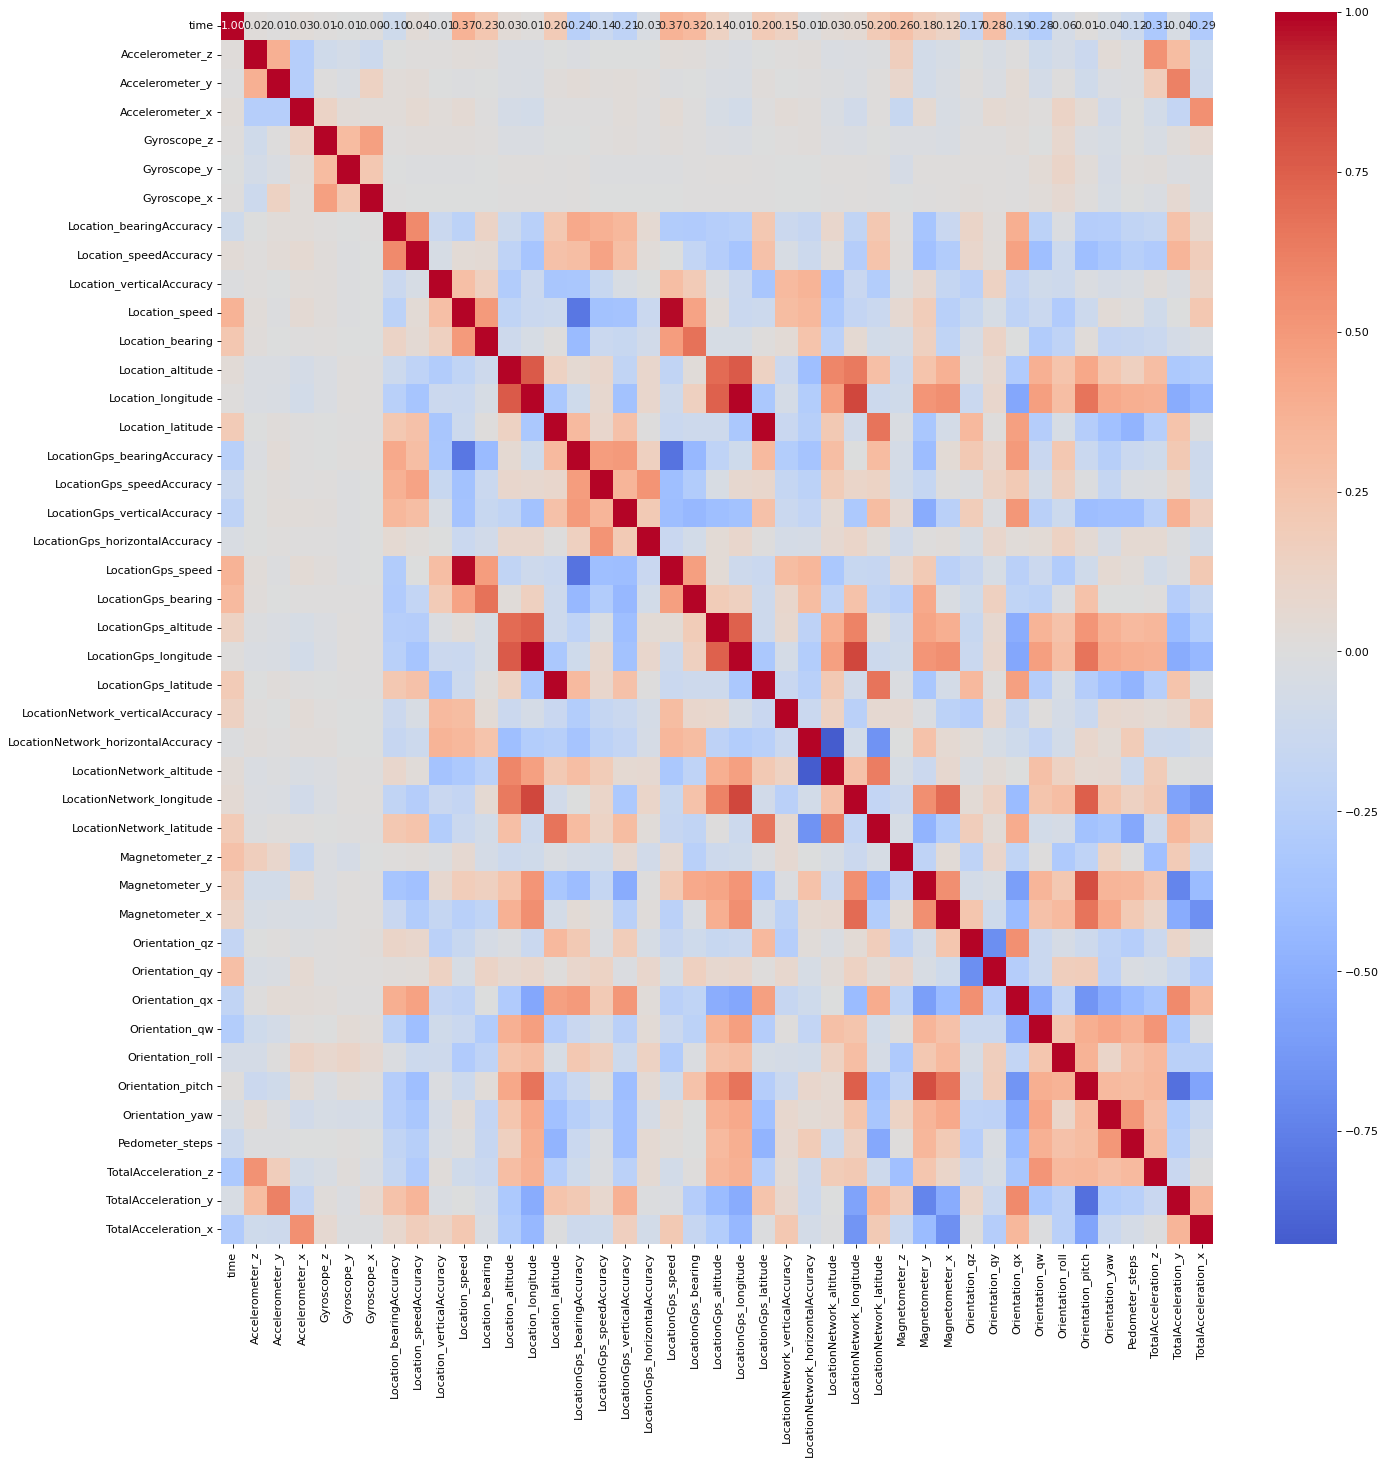

In [48]:
df_copy_corr = df_copy.loc[:,df_copy.columns != 'TYPE'].corr()
print("DF COPY WITH DROPPED ROWS WITH NA VALUES")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_copy_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

In [58]:
df_original_narrow = x_train.copy()
df_original_narrow = df_original_narrow.loc[:, ~df_original_narrow.columns.str.startswith('LocationNetwork')]
df_original_narrow = df_original_narrow.loc[:, ~df_original_narrow.columns.str.startswith('LocationGps')]
df_original_narrow.describe()

,time,Accelerometer_z,Accelerometer_y,Accelerometer_x,Gyroscope_z,Gyroscope_y,Gyroscope_x,Location_bearingAccuracy,Location_speedAccuracy,Location_verticalAccuracy,...,Orientation_qy,Orientation_qx,Orientation_qw,Orientation_roll,Orientation_pitch,Orientation_yaw,Pedometer_steps,TotalAcceleration_z,TotalAcceleration_y,TotalAcceleration_x
count,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,...,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359998e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06,1.359999e+06
mean,1.695268e+09,8.540952e-02,-2.179136e-01,-2.021225e-01,-1.232859e-02,3.230422e-03,-5.668969e-04,1.798063e+01,1.204408e+00,1.390050e+01,...,-2.504428e-01,-1.231616e-01,3.186100e-01,-1.722591e+00,6.311121e-01,-4.749584e-01,5.904498e+02,-3.999048e+00,-5.260043e+00,3.878864e+00
std,1.055928e+06,2.474240e+00,2.518269e+00,2.295758e+00,7.296111e-01,6.726834e-01,9.921875e-01,4.545167e+01,1.232588e+00,2.065057e+01,...,5.022827e-01,6.147604e-01,2.171552e-01,1.608217e+00,5.141741e-01,1.756420e+00,5.794697e+02,3.638465e+00,4.725712e+00,4.269208e+00
min,1.694673e+09,-5.080528e+01,-5.670343e+01,-5.045023e+01,-9.950325e+00,-1.255664e+01,-7.471750e+00,0.000000e+00,0.000000e+00,1.000000e+00,...,-9.985400e-01,-9.985670e-01,5.302581e-07,-3.141591e+00,-1.290022e+00,-3.141581e+00,0.000000e+00,-5.512305e+01,-6.494296e+01,-5.016105e+01
25%,1.694683e+09,-5.255368e-01,-7.862618e-01,-7.152160e-01,-3.455375e-01,-2.022625e-01,-2.950750e-01,0.000000e+00,0.000000e+00,1.387071e+00,...,-6.584114e-01,-6.557375e-01,1.456898e-01,-2.717986e+00,1.743625e-01,-2.295361e+00,8.200000e+01,-7.444951e+00,-8.598001e+00,6.139500e-01
50%,1.694857e+09,5.956066e-02,-6.634712e-03,-4.970312e-02,-8.250000e-04,1.237500e-03,-2.750000e-04,0.000000e+00,1.200000e+00,9.304260e+00,...,-3.320107e-01,-3.696966e-01,2.877433e-01,-2.421524e+00,5.900986e-01,-5.615644e-01,4.050000e+02,-3.642000e+00,-5.314050e+00,3.757050e+00
75%,1.694889e+09,5.622004e-01,4.661062e-01,6.573154e-01,2.598750e-01,2.578125e-01,2.787125e-01,9.600000e+00,1.900000e+00,1.610000e+01,...,-1.674980e-03,4.176465e-01,5.039137e-01,-1.742379e+00,1.109670e+00,9.496517e-01,1.015000e+03,-1.636950e+00,-1.080000e+00,6.259050e+00
max,1.697621e+09,5.562388e+01,3.304668e+01,3.710480e+01,8.707188e+00,9.586087e+00,9.079537e+00,1.799000e+02,1.400000e+01,1.442000e+02,...,9.991418e-01,9.985880e-01,9.919167e-01,3.141590e+00,1.570796e+00,3.141590e+00,2.158000e+03,5.212995e+01,2.454795e+01,4.634505e+01


In [59]:
null_counts = df_original_narrow.isnull().sum()

print(null_counts)

time                         0
Accelerometer_z              0
Accelerometer_y              0
Accelerometer_x              0
Gyroscope_z                  0
Gyroscope_y                  0
Gyroscope_x                  0
Location_bearingAccuracy     0
Location_speedAccuracy       0
Location_verticalAccuracy    0
Location_speed               0
Location_bearing             0
Location_altitude            0
Location_longitude           0
Location_latitude            0
Magnetometer_z               0
Magnetometer_y               0
Magnetometer_x               0
Orientation_qz               0
Orientation_qy               0
Orientation_qx               0
Orientation_qw               0
Orientation_roll             0
Orientation_pitch            1
Orientation_yaw              0
Pedometer_steps              0
TotalAcceleration_z          0
TotalAcceleration_y          0
TotalAcceleration_x          0
dtype: int64


In [67]:
na_rows = df_original_narrow[df_original_narrow['Orientation_pitch'].isna()]

print(na_rows)

y_train = y_train.drop(index=na_rows.index)


                 time  Accelerometer_z  Accelerometer_y  Accelerometer_x  \
1257257  1.694728e+09        -1.031241        -4.141401        -1.583231   

         Gyroscope_z  Gyroscope_y  Gyroscope_x  Location_bearingAccuracy  \
1257257    -1.463688     0.644188      -3.3066                       0.0   

         Location_speedAccuracy  Location_verticalAccuracy  ...  \
1257257                     0.0                  16.607643  ...   

         Orientation_qy  Orientation_qx  Orientation_qw  Orientation_roll  \
1257257        0.458657       -0.538071        0.538073         -0.854661   

         Orientation_pitch  Orientation_yaw  Pedometer_steps  \
1257257                NaN         2.266734               93   

         TotalAcceleration_z  TotalAcceleration_y  TotalAcceleration_x  
1257257               -1.029            -13.94805               -1.581  

[1 rows x 29 columns]


In [68]:
df_original_narrow.dropna(inplace=True)
null_counts = df_original_narrow.isnull().sum()

print(null_counts)

time                         0
Accelerometer_z              0
Accelerometer_y              0
Accelerometer_x              0
Gyroscope_z                  0
Gyroscope_y                  0
Gyroscope_x                  0
Location_bearingAccuracy     0
Location_speedAccuracy       0
Location_verticalAccuracy    0
Location_speed               0
Location_bearing             0
Location_altitude            0
Location_longitude           0
Location_latitude            0
Magnetometer_z               0
Magnetometer_y               0
Magnetometer_x               0
Orientation_qz               0
Orientation_qy               0
Orientation_qx               0
Orientation_qw               0
Orientation_roll             0
Orientation_pitch            0
Orientation_yaw              0
Pedometer_steps              0
TotalAcceleration_z          0
TotalAcceleration_y          0
TotalAcceleration_x          0
dtype: int64


DF ORIGINAL NARROW


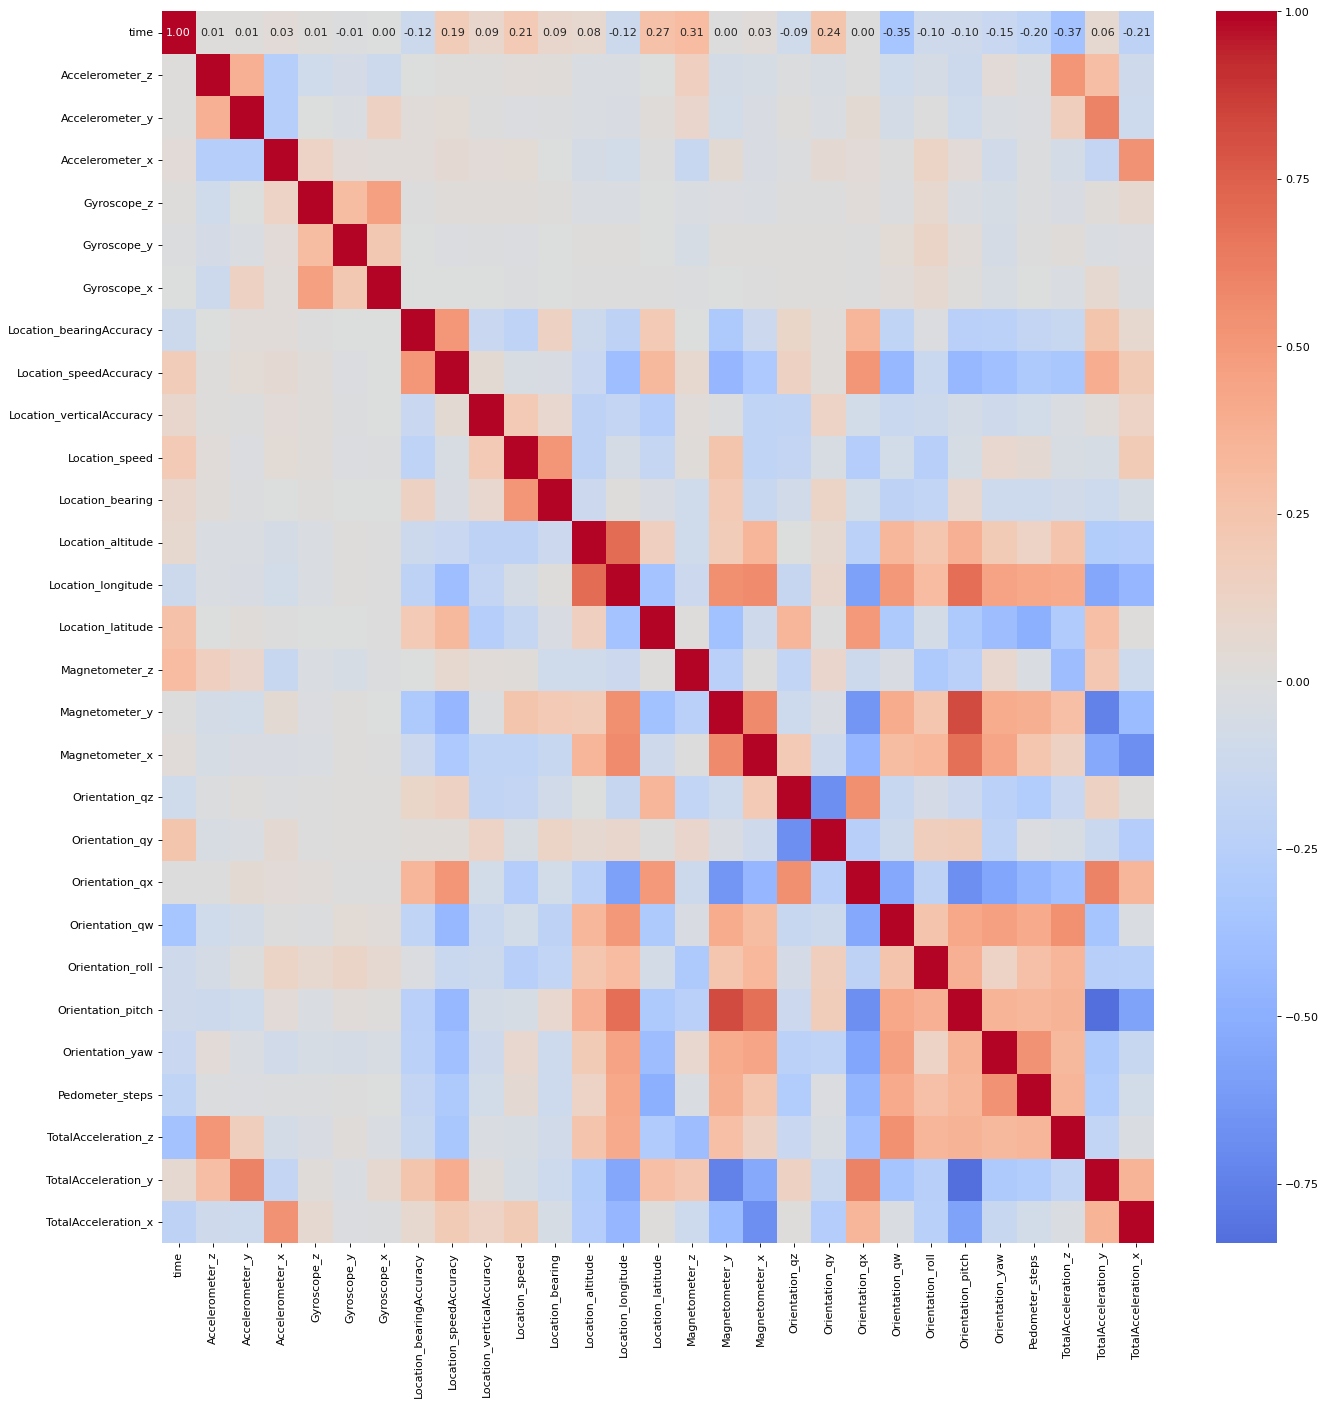

In [69]:
df_original_narrow_corr = df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'].corr()
print("DF ORIGINAL NARROW")
fig = plt.figure(figsize=(20,20), dpi=80)
sns.heatmap(df_original_narrow_corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

### KMeans clustering

In [53]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = model.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)

c:\Users\flang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[1 2 2 ... 2 1 1]


In [54]:
print(model.inertia_)

327106519019503.06


In [70]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE,Cycling,Sitting,Walking
labels,,,
0,170838,57128,0
1,454916,0,237287
2,189810,193317,56702


### Standarization

In [71]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])

c:\Users\flang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [72]:
kmeans.inertia_

29071391.908396605

In [74]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE,Cycling,Sitting,Walking
labels,,,
0,6563,250235,10635
1,711591,195,2460
2,97410,15,280894


### Normalization

In [75]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3)
pipeline = make_pipeline(scaler, normalizer, kmeans)
pipeline.fit(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
labels = pipeline.predict(df_original_narrow.loc[:,df_original_narrow.columns != 'TYPE'])
print(labels)


c:\Users\flang\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 2 2 ... 2 1 0]


In [76]:
kmeans.inertia_

1001751.0291409203

In [78]:
score_df = pd.DataFrame({'labels': labels, 'TYPE': y_train['TYPE']})
ct = pd.crosstab(score_df['labels'], score_df['TYPE'])
ct

TYPE,Cycling,Sitting,Walking
labels,,,
0,618696,209,3277
1,118153,8,280155
2,78715,250228,10557
